<a href="https://colab.research.google.com/github/trabajogrado28/Tesis/blob/main/Despu%C3%A9s_de_K_medias_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta = '/content/drive/MyDrive/fetal2023.csv'
data = pd.read_csv(ruta, encoding='latin1')

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.patches import Ellipse
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from google.colab import drive
from itertools import product
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Import necessary functions
import umap
from scipy.stats import entropy
datos_fetal2023 = data
datos_fetal2023.head(6)

,COD_DPTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,...,C_MUERTED,C_MUERTEE,C_MUERTEF,C_MUERTEG,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
0,11,1,1,1,NaN,1,2023,6,7.0,0.0,...,NaN,NaN,NaN,NaN,1,P964/P019,P964,406,1,86
1,11,1,1,1,NaN,1,2023,6,12.0,58.0,...,NaN,NaN,NaN,NaN,1,P964/P019,P964,406,1,86
2,11,1,1,1,NaN,1,2023,6,21.0,0.0,...,NaN,NaN,NaN,NaN,1,P964/P019,P964,406,1,86
3,11,1,1,1,NaN,1,2023,6,20.0,35.0,...,NaN,NaN,NaN,NaN,1,P964/P019,P964,406,1,86
4,11,1,1,1,NaN,1,2023,6,0.0,36.0,...,NaN,NaN,NaN,NaN,1,P95/P000/P027,P000,401,1,79
5,11,1,1,1,NaN,1,2023,6,14.0,33.0,...,NaN,NaN,NaN,NaN,1,P964/P019,P964,406,1,86


In [5]:
print(datos_fetal2023.columns)


Index(['COD_DPTO', 'COD_MUNIC', 'A_DEFUN', 'SIT_DEFUN', 'OTRSITIODE',
       'TIPO_DEFUN', 'ANO', 'MES', 'HORA', 'MINUTOS', 'SEXO', 'CODPRES',
       'CODPTORE', 'CODMUNRE', 'AREA_RES', 'SEG_SOCIAL', 'IDADMISALUD',
       'P_PMAN_IRIS', 'CONS_EXP', 'MU_PARTO', 'T_PARTO', 'TIPO_EMB', 'T_GES',
       'T_GES_AGRU_CIE', 'PESO_NAC', 'EDAD_MADRE', 'N_HIJOSV', 'N_HIJOSM',
       'EST_CIVM', 'NIV_EDUM', 'ULTCURMAD', 'CODOCUR', 'CODMUNOC', 'C_MUERTE',
       'C_MUERTEB', 'C_MUERTEC', 'C_MUERTED', 'C_MUERTEE', 'C_MUERTEF',
       'C_MUERTEG', 'ASIS_MED', 'CAUSA_MULT', 'C_BAS1', 'CAUSA_667',
       'IDPROFCER', 'CAU_HOMOL'],
      dtype='object')


In [6]:
datos_fetal2023.columns = datos_fetal2023.columns.str.strip()


In [7]:
datos_fetal2023.columns = datos_fetal2023.columns.str.lower()


In [8]:
datos_importantes = datos_fetal2023[['cod_dpto', 'seg_social', 'niv_edum', 'edad_madre']]

In [9]:
datos_rangos = datos_importantes[(datos_importantes["seg_social"] < 9) & (datos_importantes["niv_edum"] < 99) & (datos_importantes["edad_madre"] < 99)]
datos_rangos.head(4)

,cod_dpto,seg_social,niv_edum,edad_madre
0,11,2,4,6
1,11,5,4,2
2,11,2,4,3
3,11,1,3,2


In [10]:
# Total antes del filtrado
total_original = len(datos_importantes)

# Total después del filtrado
total_filtrado = len(datos_rangos)

# Porcentaje eliminado
porcentaje_eliminado = (total_original - total_filtrado) / total_original * 100

print(f"Porcentaje de datos eliminados: {porcentaje_eliminado:.2f}%")

Porcentaje de datos eliminados: 7.28%


In [11]:
datos_importantes.seg_social.isnull()

,seg_social
0,False
1,False
2,False
3,False
4,False
...,...
24857,False
24858,False
24859,False
24860,False


In [12]:
datos_importantes.edad_madre.isnull()

,edad_madre
0,False
1,False
2,False
3,False
4,False
...,...
24857,False
24858,False
24859,False
24860,False


In [13]:
# Filtra para conservar solo las filas que cumplan con las condiciones (seg_social < 9, niv_edum < 99, edad_madre < 99)
datos_filtros = datos_importantes[(datos_importantes["seg_social"] < 9) &
                                  (datos_importantes["niv_edum"] < 99) &
                                  (datos_importantes["edad_madre"] < 99) ]

# Reemplaza el DataFrame original con los datos filtrados
datos_importantes = datos_filtros

In [14]:
print(datos_filtros)

       cod_dpto  seg_social  niv_edum  edad_madre
0            11           2         4           6
1            11           5         4           2
2            11           2         4           3
3            11           1         3           2
4            11           5         4           3
...         ...         ...       ...         ...
24857        41           2         4           2
24858        41           2        13           4
24859        11           1         4           5
24860        68           3         8           4
24861         8           1         7           6

[23051 rows x 4 columns]


In [15]:
from sklearn.preprocessing import OneHotEncoder

# Aplicar One-Hot Encoding a todas las variables categóricas
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(datos_filtros)

In [16]:
print(data_encoded)


[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [17]:
print(f"numero de variables binarias generadas: {data_encoded.shape[1]}")

numero de variables binarias generadas: 60


In [18]:
# Convertir a DataFrame con los nombres de las columnas
columnas_categoricas = encoder.get_feature_names_out(datos_filtros.columns)
datos_finales = pd.DataFrame(data_encoded, columns=columnas_categoricas)

# Mostrar las primeras filas para verificar
print(datos_finales.head())

   cod_dpto_5  cod_dpto_8  cod_dpto_11  cod_dpto_13  cod_dpto_15  cod_dpto_17  \
0         0.0         0.0          1.0          0.0          0.0          0.0   
1         0.0         0.0          1.0          0.0          0.0          0.0   
2         0.0         0.0          1.0          0.0          0.0          0.0   
3         0.0         0.0          1.0          0.0          0.0          0.0   
4         0.0         0.0          1.0          0.0          0.0          0.0   

   cod_dpto_18  cod_dpto_19  cod_dpto_20  cod_dpto_23  ...  niv_edum_13  \
0          0.0          0.0          0.0          0.0  ...          0.0   
1          0.0          0.0          0.0          0.0  ...          0.0   
2          0.0          0.0          0.0          0.0  ...          0.0   
3          0.0          0.0          0.0          0.0  ...          0.0   
4          0.0          0.0          0.0          0.0  ...          0.0   

   edad_madre_1  edad_madre_2  edad_madre_3  edad_madre_4  eda

In [19]:
# Normalizar los datos codificados entre 0 y 1 antes de RBM
scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(datos_finales)

In [20]:
# Configuración de la Máquina de Boltzmann Restringida (RBM)
rbm = BernoulliRBM(n_components=10, learning_rate=0.01, n_iter=100, random_state=42)

# Entrenar la RBM
datos_rbm = rbm.fit_transform(datos_normalizados)

# Convertir a DataFrame para visualización
datos_rbm_df = pd.DataFrame(datos_rbm)

# Mostrar las primeras filas de las características aprendidas por la RBM
print("Representaciones aprendidas por la RBM:")
print(datos_rbm_df.head())

Representaciones aprendidas por la RBM:
          0         1         2         3         4         5         6  \
0  0.975300  0.976018  0.994173  0.004346  0.997770  0.985276  0.000618   
1  0.972211  0.000125  0.997382  0.000607  0.979433  0.976982  0.000954   
2  0.983446  0.974714  0.994288  0.003553  0.997113  0.988267  0.997600   
3  0.011119  0.185033  0.994583  0.997208  0.000039  0.005997  0.000306   
4  0.955355  0.013780  0.997187  0.001358  0.994058  0.967237  0.998403   

          7         8         9  
0  0.000355  0.032685  0.991810  
1  0.999467  0.355838  0.998397  
2  0.000402  0.004187  0.995932  
3  0.998699  0.963100  0.997577  
4  0.998912  0.000055  0.995710  


In [21]:
# Calcular la reconstrucción manualmente
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

# Propagar hacia la capa oculta
activaciones_ocultas = sigmoide(np.dot(data_encoded, rbm.components_.T) + rbm.intercept_hidden_)

# Reconstruir la entrada desde la capa oculta
X_reconstruido = sigmoide(np.dot(activaciones_ocultas, rbm.components_) + rbm.intercept_visible_)

# Calcular el error de reconstrucción
error_reconstruccion = np.mean((data_encoded - X_reconstruido) ** 2)
print(f"Error de reconstrucción de la RBM: {error_reconstruccion}")

Error de reconstrucción de la RBM: 0.01669078641591624


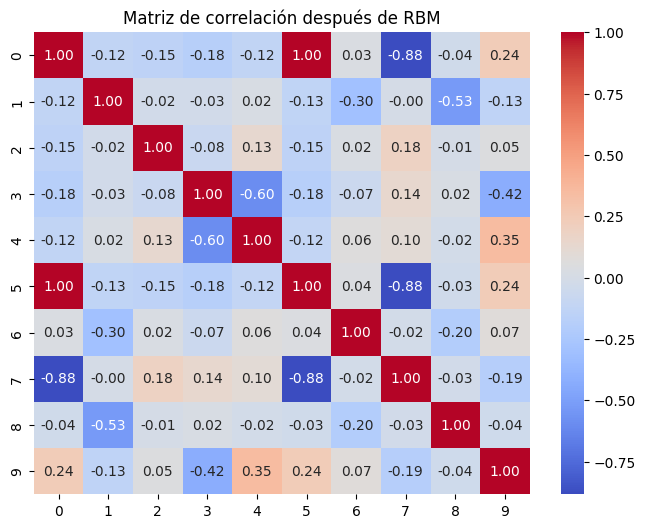

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación de las variables después de la RBM
correlation_matrix = pd.DataFrame(datos_rbm).corr()

# Graficamos la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación después de RBM")
plt.show()

PESOS DE PCA

# **K-medias**

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(datos_rbm)  # Usar la variable correcta que contiene las características transformadas por la RBM

# Asignar los clusters al DataFrame original
datos_importantes["Cluster"] = kmeans.labels_

# Ver las primeras filas con los clusters asignados
print(datos_importantes.head())

   cod_dpto  seg_social  niv_edum  edad_madre  Cluster
0        11           2         4           6        0
1        11           5         4           2        0
2        11           2         4           3        3
3        11           1         3           2        1
4        11           5         4           3        3


Estadísticas descriptivas por cluster:
          cod_dpto  seg_social  niv_edum  edad_madre
Cluster                                             
0        36.973986    2.253252  3.728896    4.419536
1        33.796970    1.036397  5.859699    4.448251
2        39.635655    2.280170  4.365231    3.767854
3        35.515201    2.353602  3.974528    3.391947


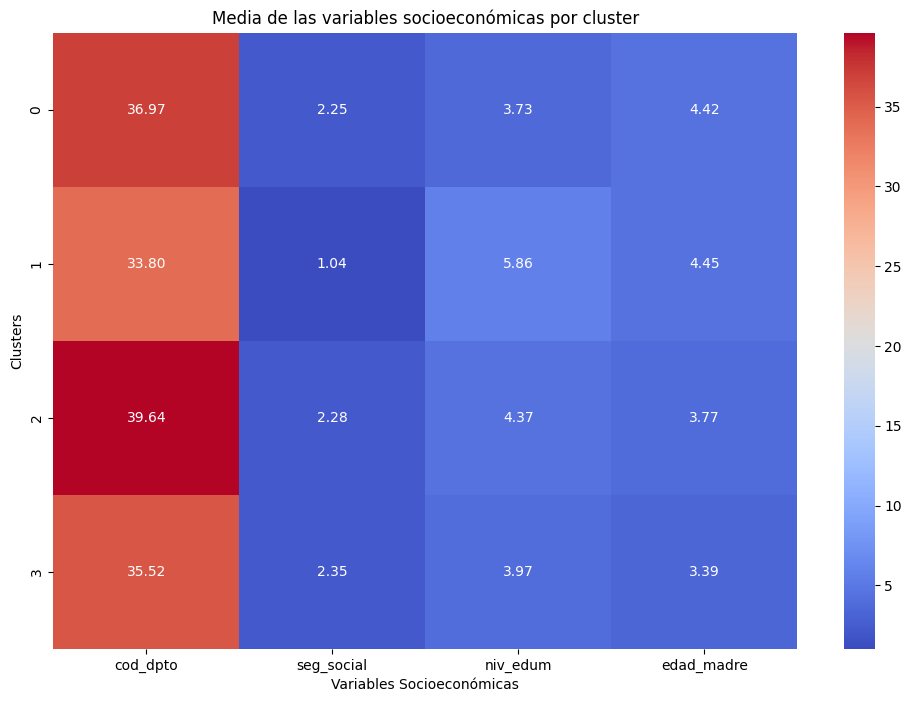

In [24]:
# Agrupar por cluster y calcular estadísticas
estadisticas_cluster = datos_importantes.groupby("Cluster").mean()

print("Estadísticas descriptivas por cluster:")
print(estadisticas_cluster)

# Visualizar las estadísticas con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(estadisticas_cluster, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Media de las variables socioeconómicas por cluster")
plt.xlabel("Variables Socioeconómicas")
plt.ylabel("Clusters")
plt.show()

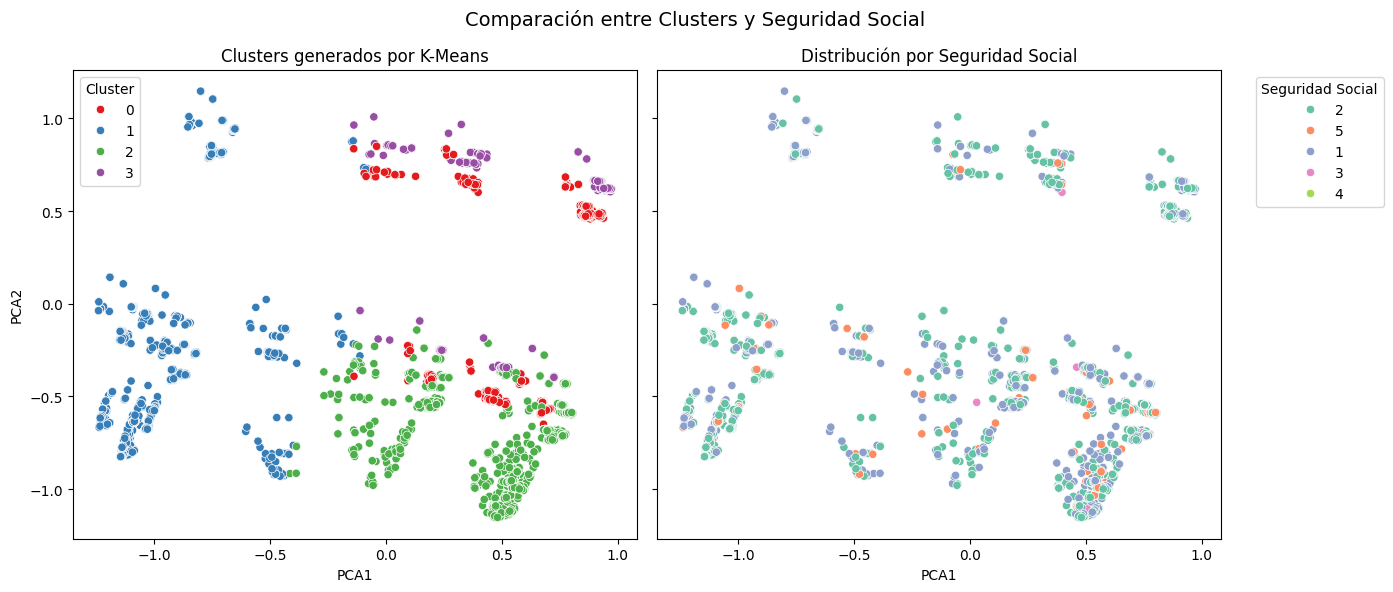

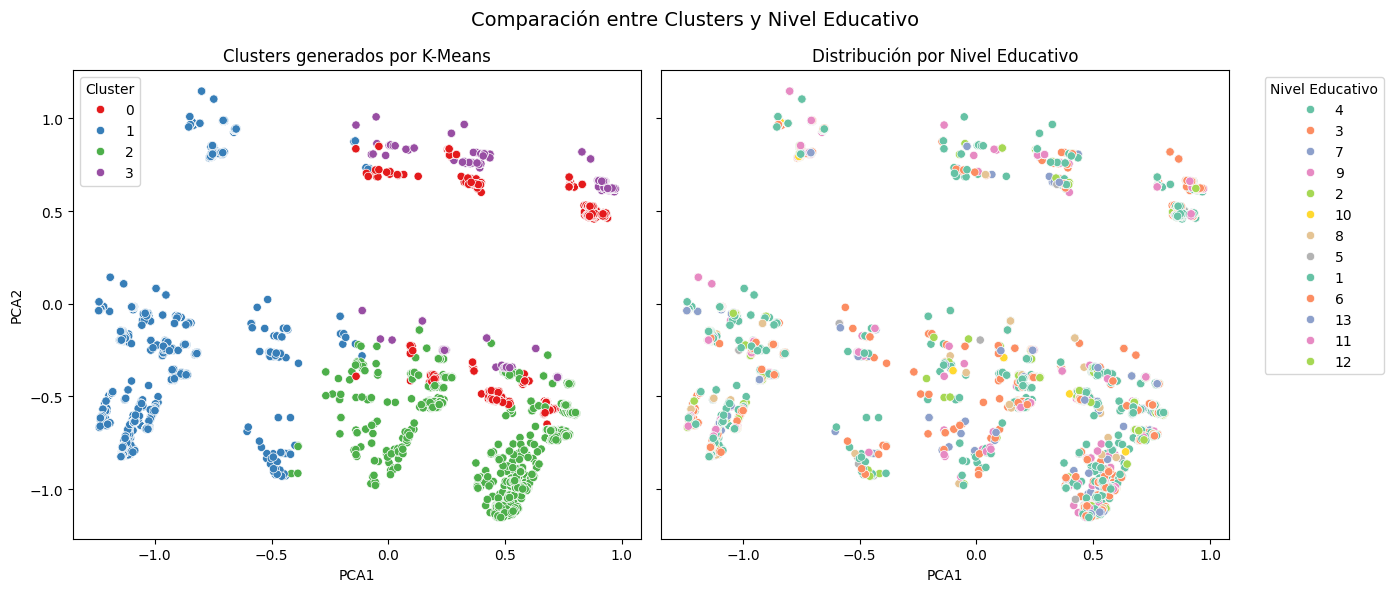

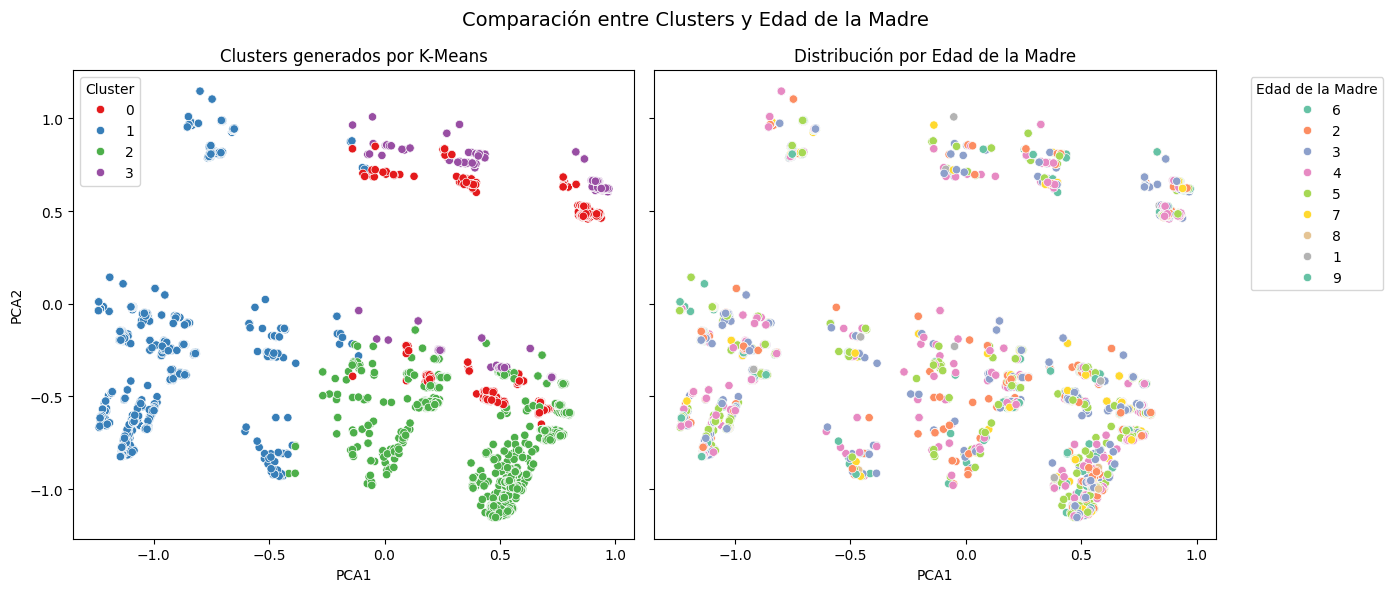

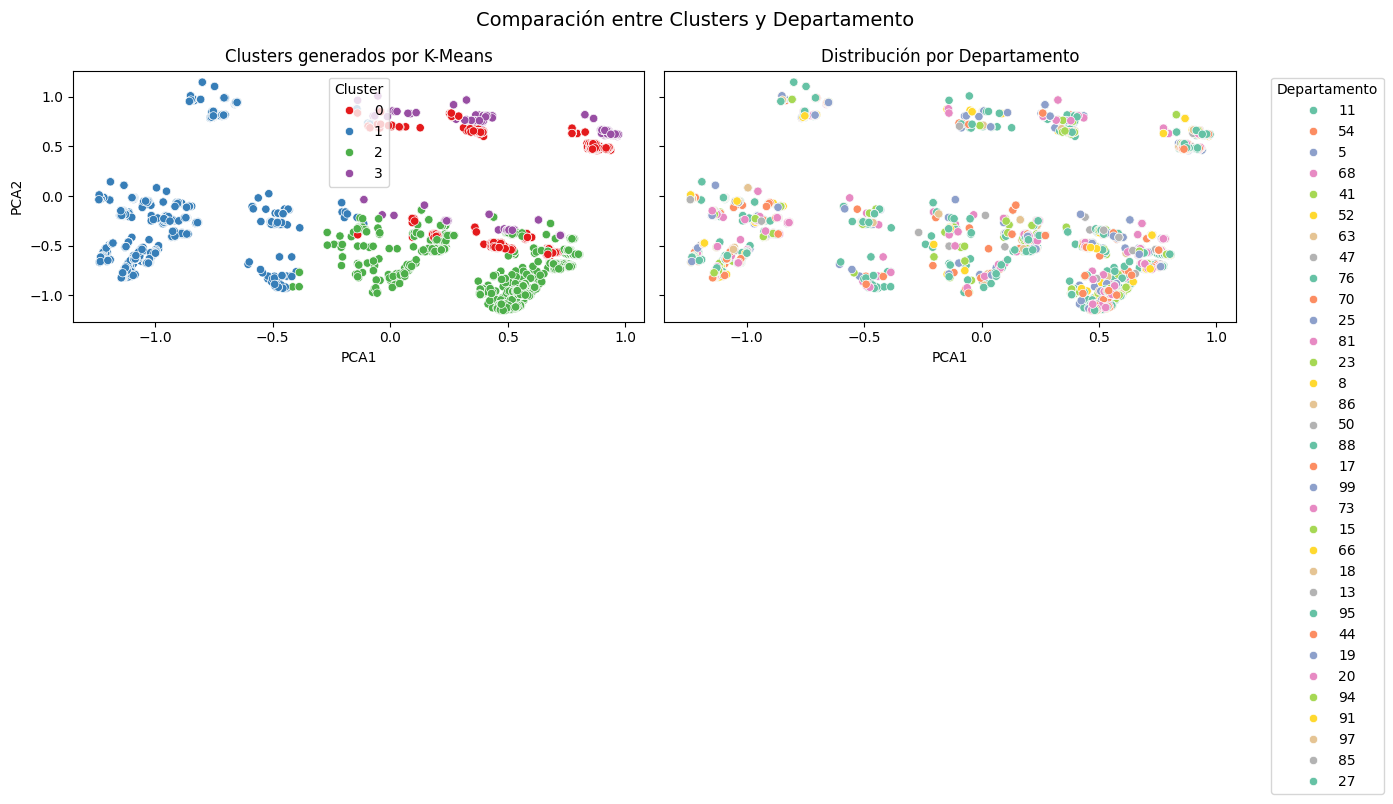

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar PCA para proyectar los datos a 2D (si ya lo hiciste antes puedes saltar esto)
pca = PCA(n_components=2)
datos_pca = pca.fit_transform(datos_rbm)

# Crear un DataFrame base para graficar
df_base = pd.DataFrame(datos_pca, columns=["PCA1", "PCA2"])
df_base["Cluster"] = kmeans.labels_

# Lista de variables originales para comparar
variables_originales = {
    "seg_social": "Seguridad Social",
    "niv_edum": "Nivel Educativo",
    "edad_madre": "Edad de la Madre",
    "cod_dpto": "Departamento"
}

# Crear una figura por cada variable comparando los clústeres con la variable original
for var, nombre in variables_originales.items():
    df_base["Referencia"] = datos_importantes[var].astype(str)  # convertir a string para usar como categoría

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

    sns.scatterplot(data=df_base, x="PCA1", y="PCA2", hue="Cluster", palette="Set1", ax=axes[0])
    axes[0].set_title("Clusters generados por K-Means")
    axes[0].legend(title="Cluster")

    sns.scatterplot(data=df_base, x="PCA1", y="PCA2", hue="Referencia", palette="Set2", ax=axes[1])
    axes[1].set_title(f"Distribución por {nombre}")
    axes[1].legend(title=nombre, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.suptitle(f"Comparación entre Clusters y {nombre}", fontsize=14)
    plt.tight_layout()
    plt.show()

In [26]:
from scipy.stats import entropy

def calcular_entropia_por_cluster(df, cluster_col, variable_col):
    entropias = {}

    for cluster_id in sorted(df[cluster_col].unique()):
        grupo = df[df[cluster_col] == cluster_id][variable_col]
        conteo = grupo.value_counts(normalize=True)
        ent = entropy(conteo, base=2)
        entropias[cluster_id] = ent

    return entropias

# Variables que quieres evaluar
variables = ['cod_dpto', 'edad_madre', 'niv_edum', 'seg_social']

# Calcular y mostrar entropías
for var in variables:
    entropias = calcular_entropia_por_cluster(datos_importantes, 'Cluster', var)
    print(f"\nEntropía por cluster respecto a '{var}':")
    for cluster, ent in entropias.items():
        print(f"  Cluster {cluster}: Entropía = {ent:.4f} bits")


Entropía por cluster respecto a 'cod_dpto':
  Cluster 0: Entropía = 4.1212 bits
  Cluster 1: Entropía = 3.4032 bits
  Cluster 2: Entropía = 4.2845 bits
  Cluster 3: Entropía = 3.9515 bits

Entropía por cluster respecto a 'edad_madre':
  Cluster 0: Entropía = 2.0887 bits
  Cluster 1: Entropía = 2.5130 bits
  Cluster 2: Entropía = 2.5441 bits
  Cluster 3: Entropía = 0.9660 bits

Entropía por cluster respecto a 'niv_edum':
  Cluster 0: Entropía = 1.1642 bits
  Cluster 1: Entropía = 2.5343 bits
  Cluster 2: Entropía = 1.8372 bits
  Cluster 3: Entropía = 0.6027 bits

Entropía por cluster respecto a 'seg_social':
  Cluster 0: Entropía = 0.4717 bits
  Cluster 1: Entropía = 0.1264 bits
  Cluster 2: Entropía = 0.4855 bits
  Cluster 3: Entropía = 0.5667 bits


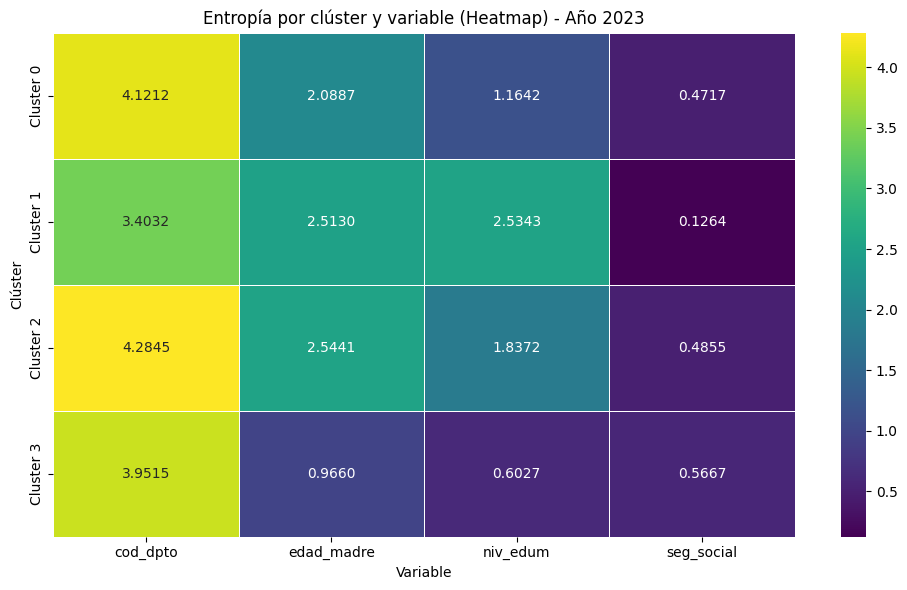

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear DataFrame de entropía corregido para 2023
df_entropia_2023 = pd.DataFrame({
    'cod_dpto': [4.1212, 3.4032, 4.2845, 3.9515],
    'edad_madre': [2.0887, 2.5130, 2.5441, 0.9660],
    'niv_edum': [1.1642, 2.5343, 1.8372, 0.6027],
    'seg_social': [0.4717, 0.1264, 0.4855, 0.5667]
}, index=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

# Generar Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_entropia_2023, annot=True, cmap="viridis", fmt=".4f", linewidths=0.5)
plt.title("Entropía por clúster y variable (Heatmap) - Año 2023")
plt.xlabel("Variable")
plt.ylabel("Clúster")
plt.tight_layout()
plt.show()


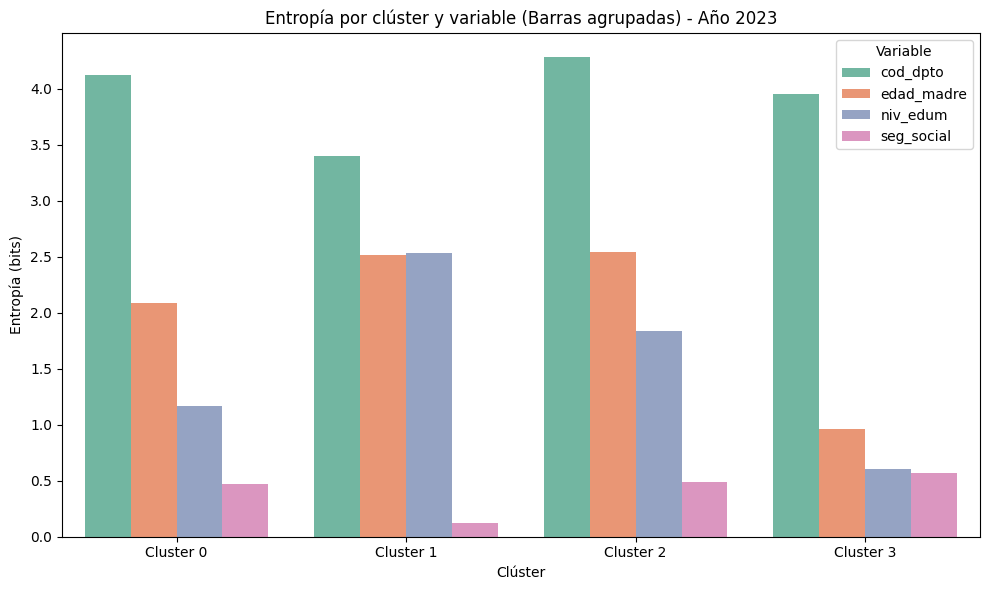

In [28]:
# Reorganizar los datos para el gráfico de barras
df_entropia_bar_2023 = df_entropia_2023.reset_index().melt(id_vars="index", var_name="Variable", value_name="Entropía")
df_entropia_bar_2023.rename(columns={"index": "Clúster"}, inplace=True)

# Gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(data=df_entropia_bar_2023, x="Clúster", y="Entropía", hue="Variable", palette="Set2")
plt.title("Entropía por clúster y variable (Barras agrupadas) - Año 2023")
plt.ylabel("Entropía (bits)")
plt.xlabel("Clúster")
plt.legend(title="Variable")
plt.tight_layout()
plt.show()

